In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#Load data
df = pd.read_csv('/content/ML Project 1 Dataset.csv')
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [4]:
df.columns

Index(['APP_ID', ' CIBIL_SCORE_VALUE ', 'NEW_CUST', 'CUS_CATGCODE ',
       ' EMPLOYMENT_TYPE ', 'AGE', ' SEX  ', ' NO_OF_DEPENDENTS ', ' MARITAL ',
       ' EDU_QUA', '  P_RESTYPE ', ' P_CATEGORY ', ' EMPLOYEE_TYPE ',
       '  MON_IN_OCC ', ' INCOM_EXP_GMI ', 'LTV', ' TENURE ', 'STATUS'],
      dtype='object')

In [5]:
# Data Cleaning
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['APP_ID', 'CIBIL_SCORE_VALUE', 'NEW_CUST', 'CUS_CATGCODE',
       'EMPLOYMENT_TYPE', 'AGE', 'SEX', 'NO_OF_DEPENDENTS', 'MARITAL',
       'EDU_QUA', 'P_RESTYPE', 'P_CATEGORY', 'EMPLOYEE_TYPE', 'MON_IN_OCC',
       'INCOM_EXP_GMI', 'LTV', 'TENURE', 'STATUS'],
      dtype='object')

In [8]:
df.isnull().sum()

APP_ID               0
CIBIL_SCORE_VALUE    0
NEW_CUST             0
CUS_CATGCODE         0
EMPLOYMENT_TYPE      0
AGE                  0
SEX                  0
NO_OF_DEPENDENTS     0
MARITAL              0
EDU_QUA              0
P_RESTYPE            0
P_CATEGORY           0
EMPLOYEE_TYPE        0
MON_IN_OCC           0
INCOM_EXP_GMI        0
LTV                  0
TENURE               0
STATUS               0
dtype: int64

In [13]:
df.dtypes

APP_ID                 int64
CIBIL_SCORE_VALUE      int64
NEW_CUST              object
CUS_CATGCODE           int64
EMPLOYMENT_TYPE        int64
AGE                    int64
SEX                   object
NO_OF_DEPENDENTS       int64
MARITAL                int64
EDU_QUA                int64
P_RESTYPE              int64
P_CATEGORY             int64
EMPLOYEE_TYPE          int64
MON_IN_OCC             int64
INCOM_EXP_GMI          int64
LTV                  float64
TENURE                 int64
STATUS                 int64
dtype: object

In [14]:
# Data Encoding
label_encoder = LabelEncoder()
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['NEW_CUST'] = label_encoder.fit_transform(df['NEW_CUST'])

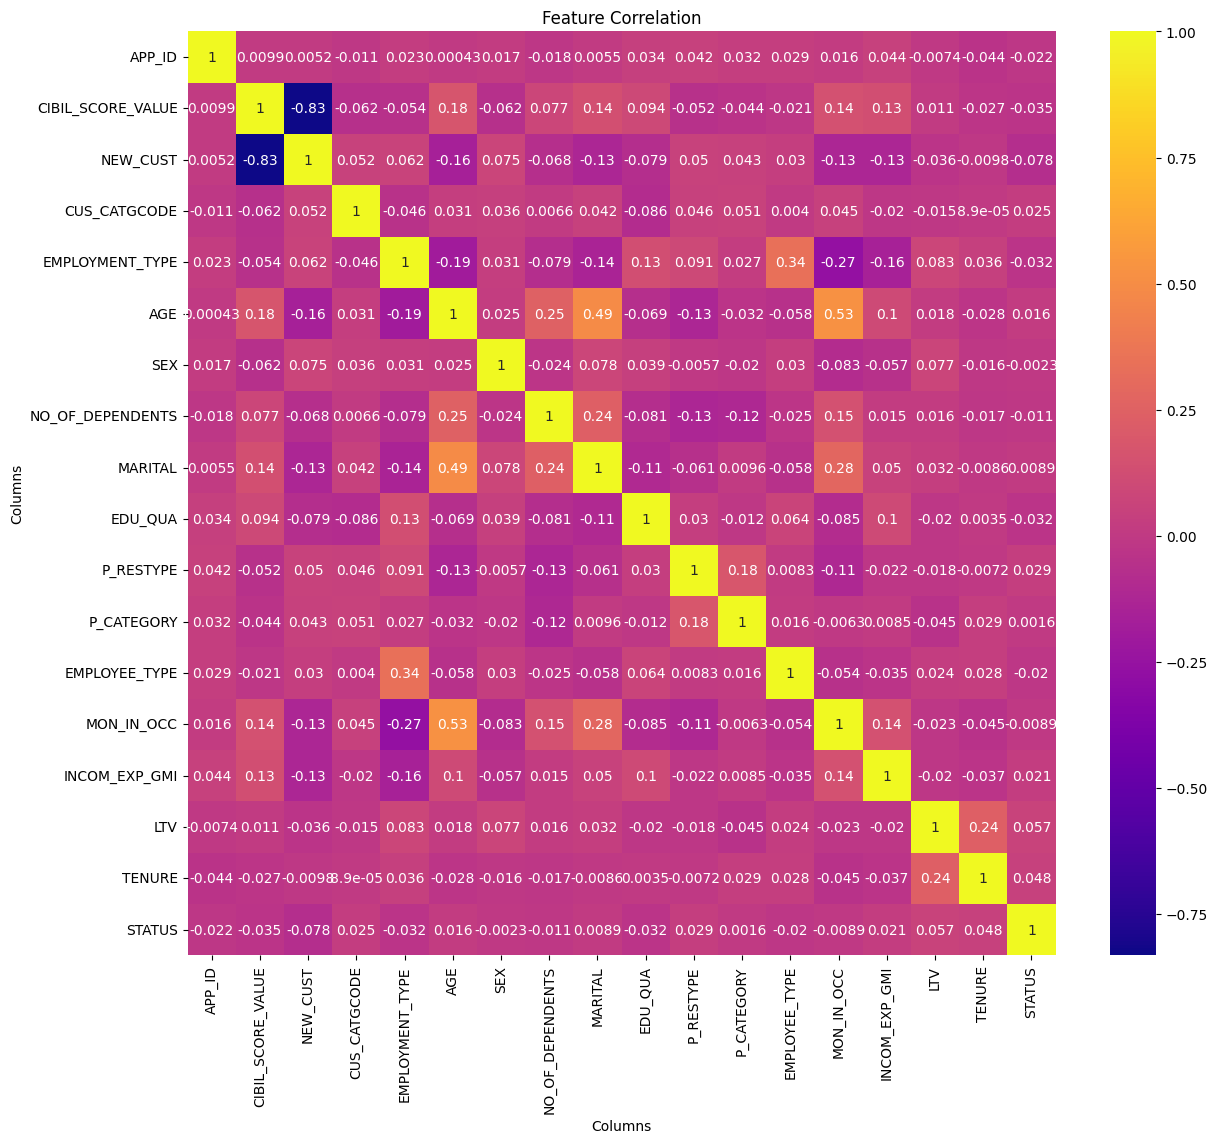

In [15]:
fig, ax = plt.subplots(figsize=(14,12)) 
sns.heatmap(df.corr(), annot=True, ax=ax,cmap='plasma').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

In [16]:
scaler = MinMaxScaler()
df[['AGE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']] = scaler.fit_transform(df[['AGE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']])

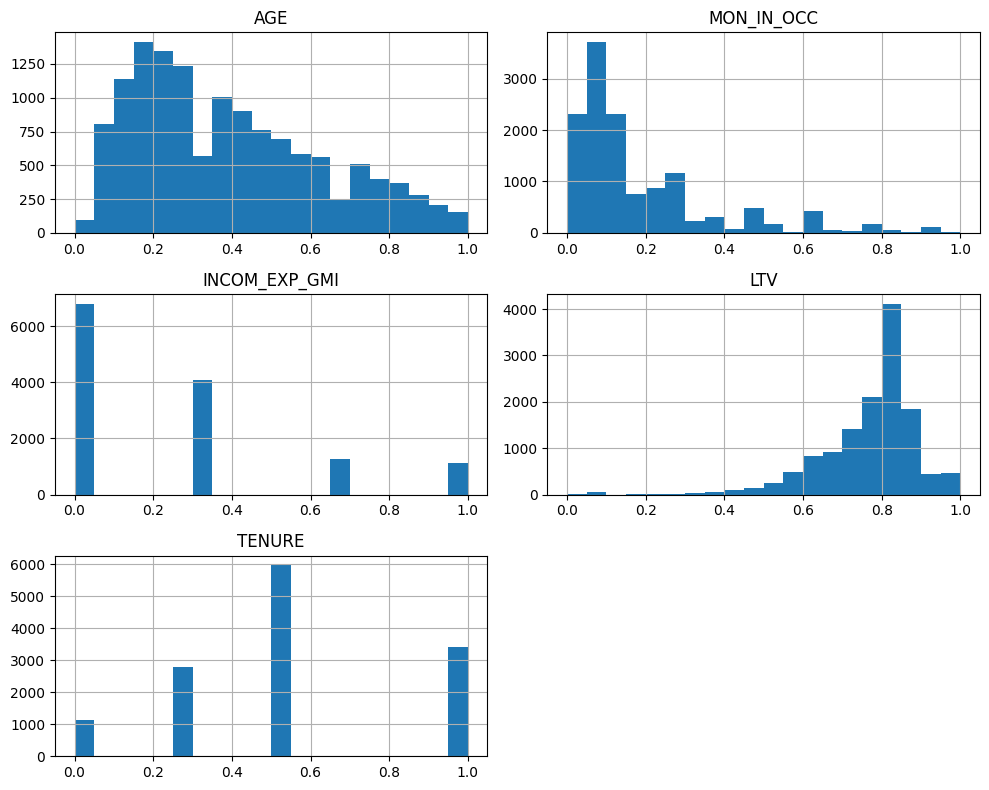

In [25]:
df[['AGE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE']].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

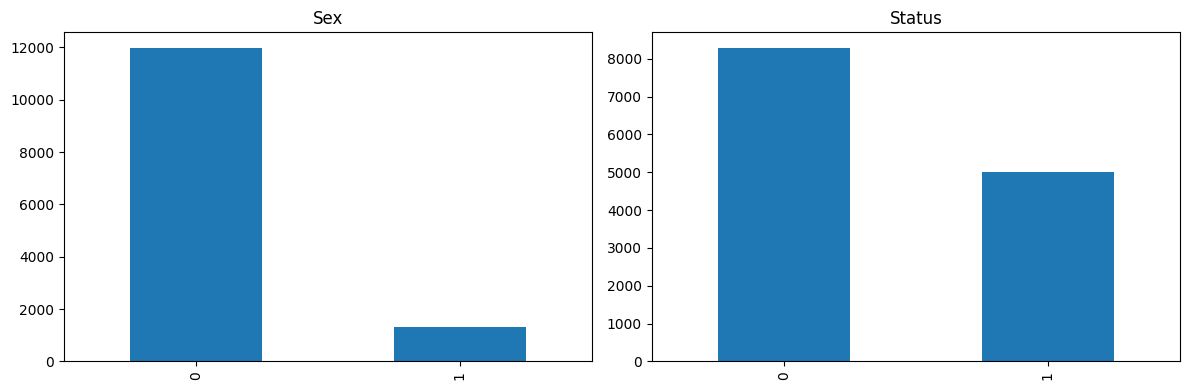

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['SEX'].value_counts().plot(kind='bar')
plt.title('Sex')
plt.subplot(1, 2, 2)
df['STATUS'].value_counts().plot(kind='bar')
plt.title('Status')
plt.tight_layout()
plt.show()

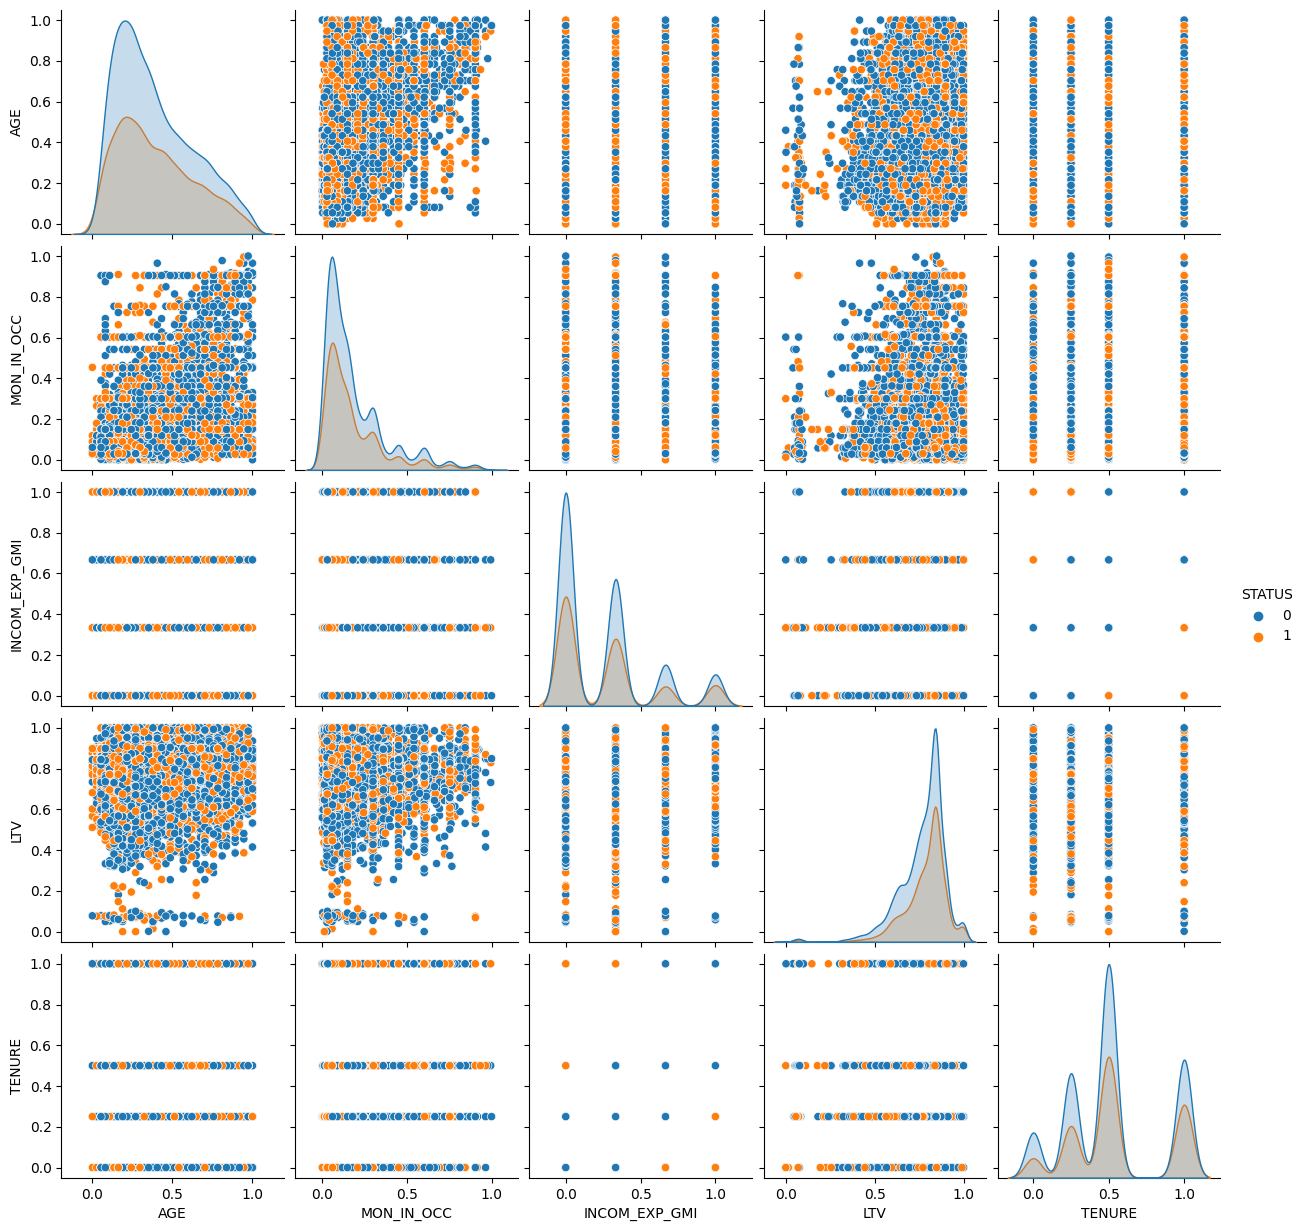

In [27]:
sns.pairplot(df[['AGE', 'MON_IN_OCC', 'INCOM_EXP_GMI', 'LTV', 'TENURE', 'STATUS']], hue='STATUS')
plt.show()

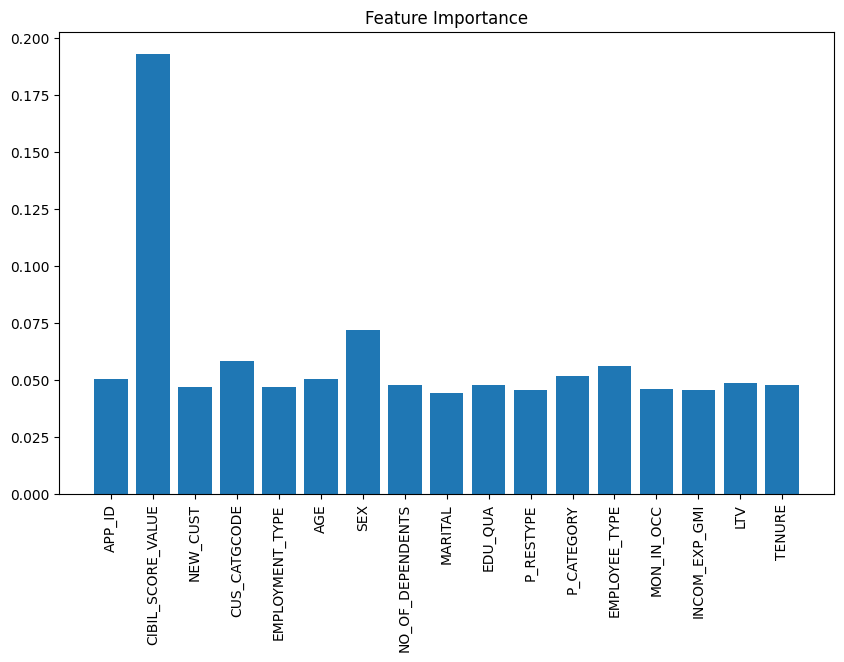

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, best_model.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

In [17]:
# Split data into X and y
X = df.drop('STATUS', axis=1)
y = df['STATUS']


In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model Training
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [20]:
# Model Prediction
y_pred = model.predict(X_test)

In [21]:
# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1308  338]
 [ 644  370]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.73      1646
           1       0.52      0.36      0.43      1014

    accuracy                           0.63      2660
   macro avg       0.60      0.58      0.58      2660
weighted avg       0.61      0.63      0.61      2660

Accuracy: 0.630827067669173


In [23]:
param_grid = {
    'learning_rate': [0.3],
    'max_depth': [6],
    'n_estimators': [400],
    'gamma': [0.3],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

# Model Training with hyperparameter tuning
model = XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train model with best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
y_pred = best_model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[1285  361]
 [ 611  403]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      1646
           1       0.53      0.40      0.45      1014

    accuracy                           0.63      2660
   macro avg       0.60      0.59      0.59      2660
weighted avg       0.62      0.63      0.62      2660

Accuracy: 0.6345864661654136
